In [43]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

In [44]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bismasajjad/global-ai-job-market-and-salary-trends-2025",
  'ai_job_dataset.csv'
)

C:\Users\lazar\AppData\Local\Temp\ipykernel_10252\3783397052.py:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [45]:
df_cleaned = df.dropna()

In [46]:
filter = df_cleaned['company_location'] == 'United States'
df_filtered = df_cleaned[filter]
df_filtered = df_filtered[['experience_level', 'years_experience', 'salary_usd', 'employment_type', 'remote_ratio']]

In [47]:
xp_level_order = ['EN', 'MI', 'SE', 'EX']
df_filtered['experience_level'] = OrdinalEncoder().fit_transform(df_filtered[['experience_level']], xp_level_order)

In [48]:
df_filtered['employment_type'] = OrdinalEncoder().fit_transform(df_filtered[['employment_type']])

<Axes: >

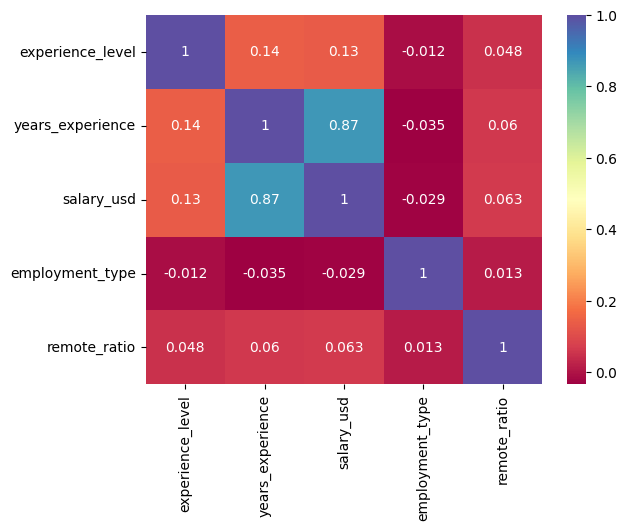

In [49]:
my_corr = df_filtered.corr(method='pearson')
sns.heatmap(my_corr, annot=True, cmap='Spectral')